In [1]:
install.packages("dplyr")
install.packages("tidyr")
install.packages("stringr")



The downloaded binary packages are in
	/var/folders/ps/pvnzhyn54r747lnlsm2c93v40000gn/T//RtmpcjNxYU/downloaded_packages

The downloaded binary packages are in
	/var/folders/ps/pvnzhyn54r747lnlsm2c93v40000gn/T//RtmpcjNxYU/downloaded_packages

The downloaded binary packages are in
	/var/folders/ps/pvnzhyn54r747lnlsm2c93v40000gn/T//RtmpcjNxYU/downloaded_packages


In [2]:
library ("dplyr")
library ("tidyr")
library("stringr")




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#libraries
library(igraph)


Attaching package: ‘igraph’


The following object is masked from ‘package:tidyr’:

    crossing


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [4]:
#get google data
google_path ="gplus/"

circles_list= list.files(google_path, pattern = "\\.circles")
length(circles_list)

[1] 132

## Question 18
    How many personal networks are there?

In [5]:
#try error: https://stackoverflow.com/questions/13613270/how-to-fix-the-error-in-r-of-no-lines-available-in-input

presonal_net_cnt=0

for (circle_file in circles_list){
    filename = paste(google_path,circle_file,sep="")
    circle_info = tryCatch(read.delim(filename,sep="\n",header=FALSE), error=function(e) NULL)
    
    if (!inherits(circle_info, 'try-error')) circle_info 
    
    if (length(unlist(circle_info)) > 2) {
        presonal_net_cnt = presonal_net_cnt +1  
    }
}
print(paste("How many personal networks (> 2 circles) are there?", presonal_net_cnt, sep=" "))

[1] "How many personal networks (> 2 circles) are there? 57"


## Question 19
    For the 3 personal networks (node ID given below), plot the in-degree and out- degree distribution of these personal networks. Do the personal networks have a similar in and out degree distribution? In this question, you should have 6 plots.

In [6]:
add_node = function(graph, new_node){
    g_new = add.vertices(graph,1,name=new_node)
    vcount_new = vcount(g_new)
    new_edge_lst = rep(0, 2*vcount_new)

    for (i in 1:length(new_edge_lst)) {
            if (i %% 2 == 0) { 
                new_edge_lst[i] = i/2 # old vertex
            }
            else {
                new_edge_lst[i] = vcount(g_new) # new vertex
            }
    }
    return (add_edges(g_new, new_edge_lst))
}

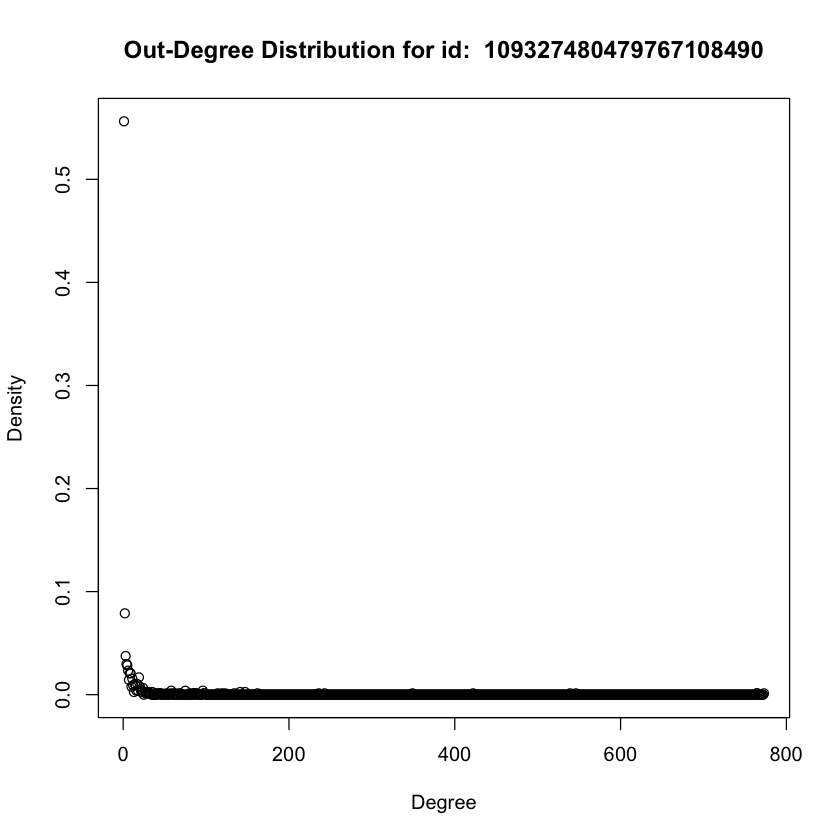

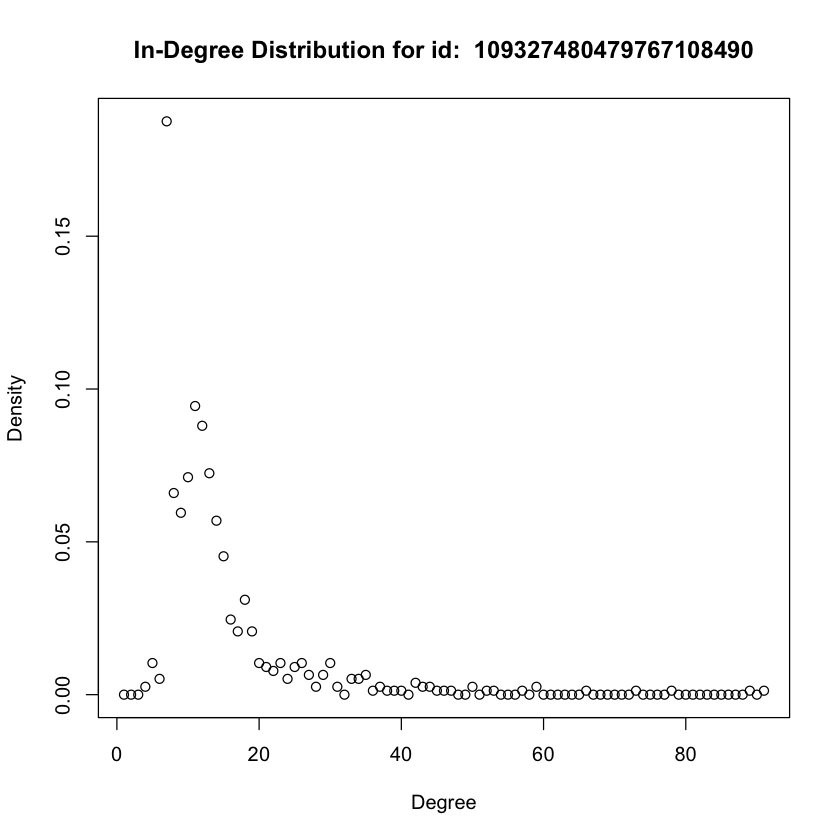

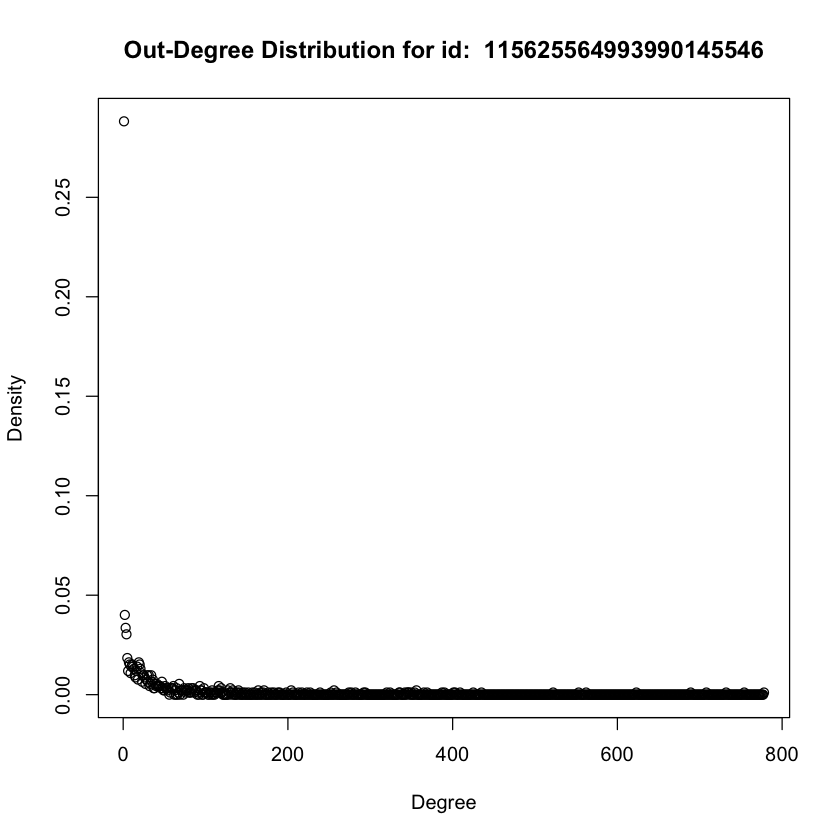

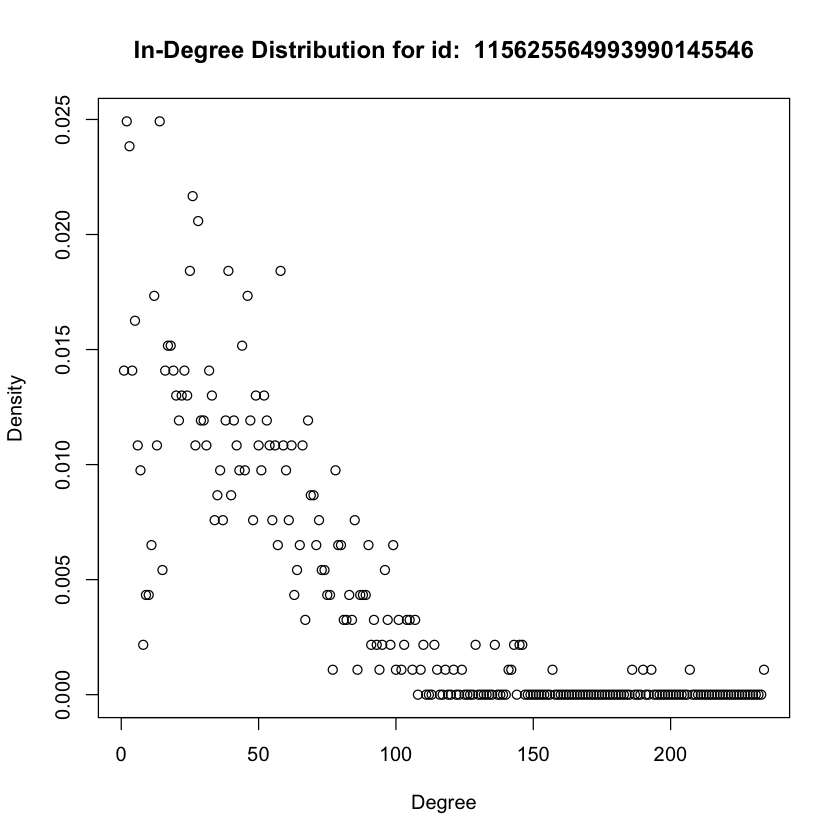

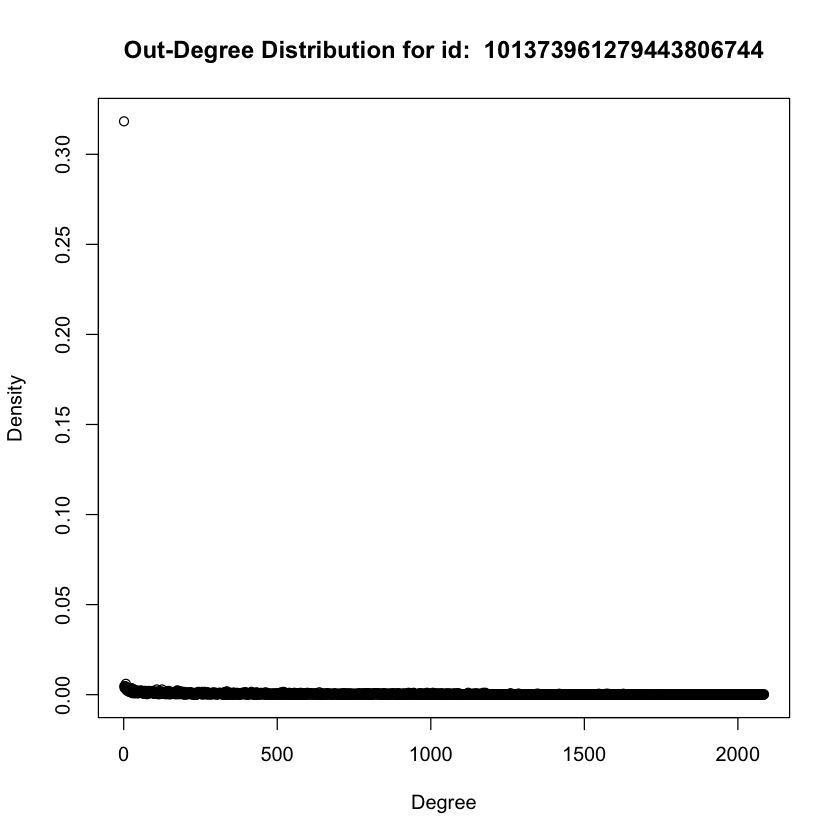

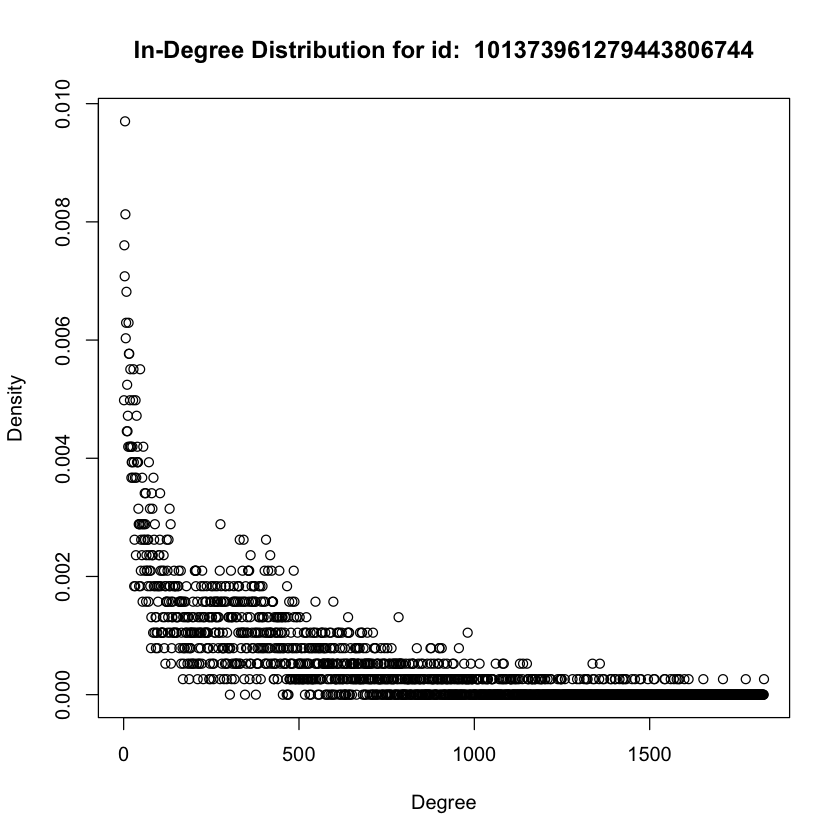

In [7]:
g_list=list()

ids = c('109327480479767108490' , 
        '115625564993990145546' ,
        '101373961279443806744')
i=1
for (id in ids){
    #    print(paste("-----",id,"-----"))
    edge_filename = paste(google_path, id, ".edges", sep="")
    edge_info = tryCatch(read.delim(edge_filename,sep="\n",header=FALSE)
                         , error=function(e) NULL)
    # graph of edge_info
    g <- read_graph(edge_filename,format="ncol",directed=TRUE)
    # need to add the ego node to the graph
    g_new <- add_node(g,id)
    g_list[[i]] = g_new
    i=i+1
    
    #plot degree distribution
    plot(degree.distribution(g, mode = "out")
         ,main=paste("Out-Degree Distribution for id: ",id)
         ,xlab="Degree", ylab="Density", type="p")           
    plot(degree.distribution(g, mode = "in")
         ,main=paste("In-Degree Distribution for id: ",id)
         ,xlab="Degree", ylab="Density", type="p")
    
}


In [8]:
length(g_list)

[1] 3

In [9]:
for( i in 1:length(g_list)){
    print(ids[i])
}

[1] "109327480479767108490"
[1] "115625564993990145546"
[1] "101373961279443806744"


## Question 20
    For the 3 personal networks picked in Question 19, extract the community structure of each personal network using Walktrap community detection algorithm. Report the modularity scores and plot the communities using colors. Are the modularity scores similar? In this question, you should have 3 plots.

In [10]:
ids = c('109327480479767108490' , 
        '115625564993990145546' ,
        '101373961279443806744')

comm_list=list()
for(i in 1:length(g_list)){
    g= g_list[[i]]
    community <- cluster_walktrap(g)
#     plot(community,g,vertex.size=1,vertex.label=NA,width=0,
#          edge.arrow.mode=0,edge.lty=0,
#          main=paste("Cluster graph id:", ids[i]))
#     plot(community,g,vertex.size=1,vertex.label=NA,
#          main=paste("Cluster graph id:", ids[i]))
#     plot(community, g_list[[i]], 
# #          layout = layout.fruchterman.reingold(graph), 
#          edge.arrow.size=0, vertex.size=3, vertex.label=NA, 
#          width=0,edge.arrow.mode=0,edge.lty=0,
#          main=paste(" Cluster graph id: ", ids[i] ))
    comm_list[[i]]=community
    print(paste("id : ", ids[i], "modularity measure: ", modularity(community)))
    
}
# comm_list

[1] "id :  109327480479767108490 modularity measure:  0.252780646085739"
[1] "id :  115625564993990145546 modularity measure:  0.319473803043365"
[1] "id :  101373961279443806744 modularity measure:  0.191093370318413"


In [11]:
length(comm_list)

[1] 3

## Question 22

In [12]:
# get number of circles and number of ppl in each circle

In [67]:
get_df = function(circle_info){
    #separate circle name from ids
    matrix <- str_split_fixed(unlist (circle_info), "\t", 2)
    
    #create dataframe from matrix
    df <- as.data.frame(matrix)
    colnames(df) <- c("circle_name","circle_ids")

    #get the ids for each circle into a list
    new_col = c()
    for(row in 1:nrow(matrix)){
        split_ids = strsplit(as.character(matrix[row,2]), split="\t")
        new_col = c(new_col, split_ids)
    }
    
    #put new columns in the dataframe and delete old column
    df["circle_ids_list"] <- NA
    for(i in 1:nrow(df)){
        df$circle_ids_list[i]= new_col[i]
    }
    df$circle_ids<-NULL
    
    return (df)
}

get_N = function(df){
    # compute N
    n_total= 0
    
    for(i in 1:nrow(df)){
        n_total = n_total + length(unlist(df$circle_ids_list[i]))
    }
    return (n_total)
}

get_all_ids = function(df){
    ids = c()
    for(i in 1:nrow(df)){
        ids = c(ids, unlist(df$circle_ids_list[i]))
    }
    return (ids)
}

In [102]:
get_HC= function(df){
    sum_C=0
    for(c_name in df$circle_name){
    #     print(c_name)
        c_ids_list= df$circle_ids_list[df$circle_name==c_name]
    #     print(paste("# circle_members: ", length(unlist(c_ids_list))))
        ai_N= length(unlist(c_ids_list))/length(all_ids)
    #     print(ai_N)
        sum_C = ai_N*log(ai_N) + sum_C
    #     sum_C = ai_N + sum_C
    }
    print(paste("H(C):",-sum_C, sep=" "), quote=F)
    
    return(-sum_C)
}

In [135]:
# params: community structure, list of all ids in circle(s)
get_HK=function(comm,all_ids){
    sum_k=0
    for(comm_indx in 1:length(comm)){
        this_comm= comm[comm_indx]
        b_i= length (intersect(unlist(this_comm), (all_ids)))
    #     print(b_i)
        if(b_i >0){
            sum_k = sum_k + (b_i/length(all_ids))*log(b_i/length(all_ids))
        }
    }
    print(paste("H(K):",-sum_k, sep=" "), quote=F)
    return(-sum_k)
}

In [146]:

get_HCK = function(comm, df, all_ids){
    sum_CK=0
    
    for(comm_indx in 1:length(comm)){
        this_comm= comm[comm_indx]
        b_j= length (intersect(unlist(this_comm), (all_ids)))
#         print(b_j)
        for(c_name in df$circle_name){
            c_ids_list = df$circle_ids_list[df$circle_name==c_name]
#             print(length(unlist(c_ids_list)))
            A_ji= length (intersect(unlist(this_comm), unlist(c_ids_list)))
            
            if(A_ji>0 & b_j >0){

                sum_CK = sum_CK + (A_ji/length(all_ids))*(log(A_ji/b_j))

            }
#             print(paste("community number:", comm_indx, 
#                         "   circle: " ,c_name, 
#                         "   A_ji:",A_ji , sep =" "))
        }
    }
    print(paste("H(C|K):",-sum_CK, sep=" "), quote=F)
    
    return(-sum_CK)
}


In [147]:
#H(K|C)
get_HKC = function(comm, df, all_ids){
    sum_KC=0

    for(c_name in df$circle_name){
        #get list of ids in this circle
        c_ids_list = df$circle_ids_list[df$circle_name==c_name]
        a_i = length(unlist(c_ids_list))

        #check each cluster/community to get the list of ids in this community
        for(comm_indx in 1:length(comm)){
            this_comm= comm[comm_indx]
            A_ji= length (intersect(unlist(this_comm), unlist(c_ids_list)))
            if(A_ji>0 & a_i >0){  
                sum_KC = sum_KC + (A_ji/length(all_ids))*(log(A_ji/a_i))
            }
#             print(paste("community number:", comm_indx, 
#                             "   circle: " ,c_name, 
#                             "   A_ji:",A_ji , sep =" "))
        }
    }
    print(paste("H(K|C):",-sum_KC, sep=" "), quote=F)
    
    return(-sum_KC)
}

In [149]:

for(id_indx in 1:length(ids)){
    circle_filename = paste(google_path, ids[id_indx], ".circles", sep="")
    circle_info = tryCatch(read.delim(circle_filename,sep="\n",header=FALSE)
                         , error=function(e) NULL)
                           
    df = get_df(circle_info)
    comm = comm_list[[id_indx]]
    all_ids= unique(get_all_ids(df))


    print(paste("---id: ", ids[id_indx], "----"))
    hc = get_HC(df) 
    hk = get_HK(comm, all_ids)
    hck = get_HCK(comm, df, all_ids)
    hkc = get_HKC(comm, df, all_ids)
                           
    h= 1- hck/hc
    c= 1- hkc/hk
                           
    print(paste("h:",h, sep=" "), quote=F)
    print(paste("c:",c, sep=" "), quote=F)
}

[1] "---id:  109327480479767108490 ----"
[1] H(C): 1.05077934757594
[1] H(K): 1.00520818089008
[1] H(C|K): 0.155636061763332
[1] H(K|C): 0.673616224340775
[1] h: 0.851885115440867
[1] c: 0.329873913536689
[1] "---id:  115625564993990145546 ----"
[1] H(C): 8.46514668159249
[1] H(K): 1.08119096358335
[1] H(C|K): 4.63982898243534
[1] H(K|C): 4.78314811509253
[1] h: 0.451890303032235
[1] c: -3.4239623491117
[1] "---id:  101373961279443806744 ----"
[1] H(C): 0.384319958960942
[1] H(K): 0.493330612772394
[1] H(C|K): 0.382833906292573
[1] H(K|C): 1.23541745845449
[1] h: 0.0038667069813052
[1] c: -1.5042383879479


In [129]:
id_indx=2
circle_filename = paste(google_path, ids[id_indx], ".circles", sep="")
circle_info = tryCatch(read.delim(circle_filename,sep="\n",header=FALSE)
                     , error=function(e) NULL)

df = get_df(circle_info)
comm = comm_list[[id_indx]]
all_ids= unique(get_all_ids(df))
sizes(comm)
# comm[1]
length((all_ids))

Community sizes
  1   2   3   4   5   6   7   8   9  10 
 37   2 256  40 233 350   3   1   1   1 

[1] 727

In [133]:
sum_k=0
for(comm_indx in 1:length(comm)){
    this_comm= comm[comm_indx]
#     print(length(all_ids))
    b_i= length (intersect(unlist(this_comm), (all_ids)))
    print(b_i)
    if(b_i >0){
        sum_k = sum_k + (b_i/length(all_ids))*log(b_i/length(all_ids))
    }
        
}
print(paste("H(K):",-sum_k, sep=" "), quote=F)
-sum_k

[1] 1
[1] 0
[1] 146
[1] 3
[1] 231
[1] 345
[1] 1
[1] 0
[1] 0
[1] 0
[1] H(K): 1.08119096358335


[1] 1.081191

In [105]:
# TO DO: do this for all 3 IDs
id_indx =1
circle_filename = paste(google_path, ids[id_indx], ".circles", sep="")
circle_info = tryCatch(read.delim(circle_filename,sep="\n",header=FALSE)
                         , error=function(e) NULL)
    

In [106]:
df = get_df(circle_info)

In [107]:
n_total = get_N(df)
n_total

[1] 1095

In [108]:
#H(C)
get_HC(df)

[1] H(C): 1.0930883567809


[1] 1.093088

In [98]:
# H(K)
# comm
comm = comm_list[[id_indx]]

get_HK(comm, get_all_ids(df))

[1] H(K): 0.95248824288243


[1] 0.9524882

In [110]:
# H(C|K)
comm = comm_list[[id_indx]]
# print(length(comm))
get_HCK(comm, get_all_ids(df))

[1] "community number: 1    circle:  GpWY5xaC4pg    A_ji: 251"
[1] "community number: 1    circle:  NnqojnKraci    A_ji: 267"
[1] "community number: 1    circle:  3akP45BKSp9    A_ji: 13"
[1] "community number: 2    circle:  GpWY5xaC4pg    A_ji: 4"
[1] "community number: 2    circle:  NnqojnKraci    A_ji: 4"
[1] "community number: 2    circle:  3akP45BKSp9    A_ji: 393"
[1] "community number: 3    circle:  GpWY5xaC4pg    A_ji: 75"
[1] "community number: 3    circle:  NnqojnKraci    A_ji: 75"
[1] "community number: 3    circle:  3akP45BKSp9    A_ji: 0"
[1] "community number: 4    circle:  GpWY5xaC4pg    A_ji: 0"
[1] "community number: 4    circle:  NnqojnKraci    A_ji: 0"
[1] "community number: 4    circle:  3akP45BKSp9    A_ji: 13"


[1] 0.1085899

In [ ]:
#for each community
for(i in 1:length(comm_arr)){
    print(paste("community:", i , "size: ", comm_arr[i], sep=" "), quote=F)
    
    #get ids in this community
    this_comm = comm[i]
    for(c_name in df$circle_name){
        print(c_name)
    }
    #for each circle, check to see if they are in this community
    
    
}

# Testing

In [ ]:
# df <- as.data.frame(Reduce(rbind, circle_info))
# colnames(df) <- c("circle_info")
# df <- str_split_fixed(df$circle_info, "\t", 2)
# df

In [ ]:
# tst = "this\tis\ta\ttest"
# df <- str_split_fixed(df$circle_info, "\t", 2)
# colnames(df) <- c("circle_name", "ids")

In [72]:
# all_ids = get_all_ids(df)
# length(all_ids)
# for (i in 1:length(membership(comm))) {
#     comm_idx = membership(comm)[i]
#     if(!(names(comm_idx) %in% all_ids)){
#         print(paste(names(comm_idx), "FALSE!!!", sep="   "))
#     }
# }

[1] 1095

[1] "105690580176603415513   FALSE!!!"
[1] "108258291530489905301   FALSE!!!"
[1] "101324272272894475972   FALSE!!!"
[1] "108109735467707506600   FALSE!!!"
[1] "112463391491520264813   FALSE!!!"
[1] "101772915309691498184   FALSE!!!"
[1] "104628010479258750258   FALSE!!!"
[1] "117076590591131993366   FALSE!!!"
[1] "113172335374379554341   FALSE!!!"
[1] "109327480479767108490   FALSE!!!"


In [ ]:
# # df[1,2]
# ids = strsplit(df[1,2], split="\t")
# length(unlist(ids))


In [ ]:
# df <- as.data.frame(Reduce(rbind, circle_info))
# colnames(df) <- c("circle_info")

In [ ]:
#  circle_split = strsplit(toString (circle_data_tst[1]), split="\t", fixed = FALSE)
#  circle_d =   unlist(circle_split)
#  circle_ids = circle_d[-1]

In [27]:
# H(C|K)
comm = comm_list[[id_indx]]

sum_CK=0

comm_indx= 4

comm_sz_arr = sizes(comm)
this_comm= comm[comm_indx]

for(c_name in df$circle_name){
    c_ids_list = df$circle_ids_list[df$circle_name==c_name]
    A_ji= length (intersect(unlist(this_comm), unlist(c_ids_list)))
    if(A_ji>0){
        b_j= comm_arr[comm_indx]
        sum_CK = sum_CK + (A_ji/n_total)*(log(A_ji/b_j))
 
    }
    print(A_ji)
}

sum_CK

[1] 0
[1] 0
[1] 13


4 
0